# ASSIGNMENT_MET_359
# Precipitation Over Ghana > 250mm From 1983 t0 1992

In [91]:
import xarray as xr 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [19]:
dt= xr.open_dataset('Africa_cru_data.nc')
dt

<xarray.Dataset>
Dimensions:  (lon: 150, lat: 146, time: 1440)
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [21]:
pre_dt=dt['pre']
pre_dt

<xarray.DataArray 'pre' (time: 1440, lat: 146, lon: 150)>
[31536000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [83]:
llt = pre_dt.sel(lon=slice(-3.5, 1.5), lat=slice(4.5, 11.5), time=slice('1983', '1992'))
llt

<xarray.DataArray 'pre' (time: 120, lat: 14, lon: 10)>
array([[[       nan,   0.      , ...,        nan,        nan],
        [  0.      ,   0.      , ...,        nan,        nan],
        ...,
        [  0.      ,   0.      , ...,   0.      ,   0.      ],
        [  0.      ,   0.      , ...,   0.      ,   0.      ]],

       [[       nan,   7.9     , ...,        nan,        nan],
        [ 12.400001,  12.400001, ...,        nan,        nan],
        ...,
        [  5.9     ,   9.900001, ...,   0.4     ,   0.      ],
        [  1.1     ,   3.2     , ...,   1.9     ,   0.      ]],

       ...,

       [[       nan, 106.700005, ...,        nan,        nan],
        [130.7     ,  98.200005, ...,        nan,        nan],
        ...,
        [ 24.5     ,  18.800001, ...,   9.900001,  11.7     ],
        [ 22.6     ,  14.5     , ...,   7.9     ,   6.1     ]],

       [[       nan,  67.5     , ...,        nan,        nan],
        [ 50.3     ,  55.4     , ...,        nan,        nan],
        ...,
        [  0.      ,   0.      , ...,   0.      ,   0.      ],
        [  0.      ,   0.      , ...,   0.      ,   0.      ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.75 5.25 5.75 6.25 6.75 ... 9.75 10.25 10.75 11.25
  * time     (time) datetime64[ns] 1983-01-16 1983-02-15 ... 1992-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [85]:
Annual_Where = llt.where(llt>250).groupby('time.year')

In [87]:
Annual_Count=Annual_Where.count('time')
Annual_Count

<xarray.DataArray 'pre' (year: 10, lat: 14, lon: 10)>
array([[[0, 2, 1, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 1, 0, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
...
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 1, 1, ..., 0, 0, 0],
        [0, 1, 2, ..., 0, 0, 0],
        [0, 0, 1, ..., 1, 2, 0],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [1, 0, 0, ..., 1, 1, 1],
        [0, 0, 1, ..., 1, 0, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [2, 1, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.75 5.25 5.75 6.25 6.75 ... 9.75 10.25 10.75 11.25
  * year     (year) int64 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

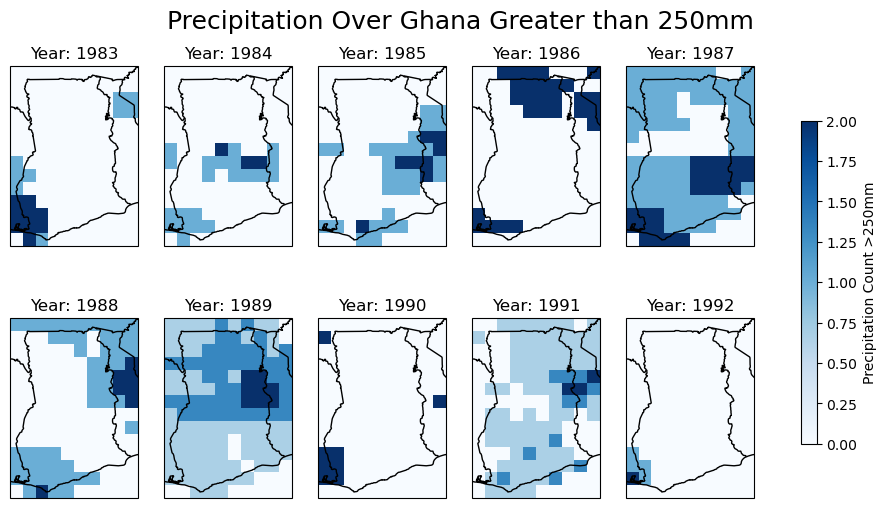

In [101]:
## # Create 10 subplots (2 rows, 5 columns)
fig, axes = plt.subplots(2,5 , figsize=(12, 6), sharex=True, sharey=True,
                         subplot_kw={'projection': ccrs.PlateCarree()})  # Set projection
axes = axes.flatten()  # Flatten for looping

# Group data by year and plot each year
for i, (year, dt) in enumerate(llt.groupby('time.year')):
    ax = axes[i]
    # Count occurrences >250mm
    precipation = dt.where(dt > 250).count(dim='time')  
    
    # Plot the precipitation
    precipation.plot(ax=ax, cmap="Blues", add_colorbar=False)

    # Adding features
    ax.add_feature(cfeature.BORDERS, edgecolor='black')  
    ax.add_feature(cfeature.COASTLINE, edgecolor='black') 
    # Extent for Ghana
    ax.set_extent([-3.5, 1.5, 4.5, 11.5])  
    
    ax.set_title(f'Year: {year}')
    fig.suptitle('Precipitation Over Ghana Greater than 250mm', fontsize=18, y=0.95)

# Adjust layout and add a single colorbar
fig.colorbar(axes[0].collections[0], ax=axes, orientation='vertical', shrink=0.7, label="Precipitation Count >250mm")
plt.show()
